# Import Dataset

In [1]:
import pandas as pd
import re

hn = pd.read_csv("04_Data_Cleaning/04_2_Advanced_data_cleaning/hacker_news.csv")

titles = hn["title"]

# 1 Introduction

1. Create a case insensitive regex pattern that matches all case variations of the letters SQL.

1. Use that regex pattern and the ignorecase flag to count the number of mentions of SQL in titles. Assign the result to `sql_counts`.

In [2]:
pattern = r"sql" 
sql_counts = titles.str.contains(pattern,flags=re.I).sum()

# 2 Capture Groups

We define a **capture group** by wrapping the part of our pattern we want to capture in parentheses. If we want to capture the whole pattern, we just wrap the whole pattern in a pair of parentheses:

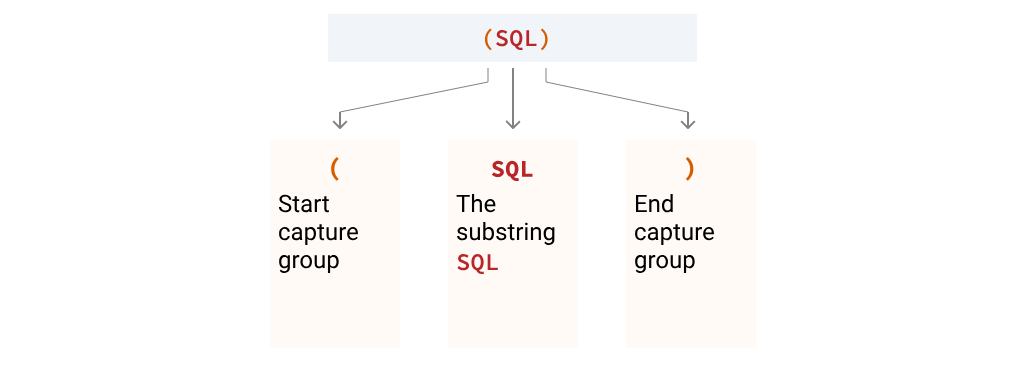

Recall that we specify expand=False with the `Series.str.extract()` method to return a series. Lastly, we use the `Series.value_counts()` method to create a frequency table of those capitalizations:



## Example - Capture SQL groups

Let's look at how we can use a capture group to create a frequency table of the different **capitalizations** of SQL in our dataset. We start by wrapping our regex pattern in parentheses.

Next, we use `Series.str.extract()` to extract the different capitalizations:

In [ ]:
pattern = r"(SQL)"
sql_capitalizations = titles.str.extract(pattern, flags=re.I, expand=False)
sql_capitalizations_freq = sql_capitalizations.value_counts() #generate frequency table os SQL
print(sql_capitalizations_freq)

title
SQL    101
Sql      4
sql      3
Name: count, dtype: int64


We can extend this analysis by looking at titles that have letters immediately before the "SQL," which is a convention often used to denote different variations or flavors of SQL:

In [4]:
pattern = r"(\w+SQL)"
sql_flavors = titles.str.extract(pattern, flags=re.I, expand=False)
sql_flavors_freq = sql_flavors.value_counts()
print(sql_flavors_freq)

title
PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
CloudSQL       1
Name: count, dtype: int64


Notice how there is some duplication due to varied capitalization in this frequency table:

```
NoSQL and nosql
MySQL and mysql

```

## Instructions

We have created a new dataframe, hn_sql, including only rows that mention a SQL flavor.

1. Create a new column called `flavor` in the `hn_sql` dataframe, containing extracted mentions of SQL flavors, defined as:

    - Any time 'SQL' is preceded by one or more word characters.
    
    - Ignoring all case variation.

1. Use the `Series.str.lower()` method to clean the values in the flavor column by converting them to lowercase. Assign the values back to the column in `hn_sql`.

1. Use the `DataFrame.pivot_table()` method to create a pivot table, `sql_pivot`.
    - The index of the pivot table should be the `flavor` column.
    - The values of the pivot table should be the mean of the `num_comments` column, aggregated by SQL flavor.

In [ ]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()

#create flavor column (type of SQL)
#str.extract only works with capture groups (SQL)
hn_sql['flavor'] = hn_sql['title'].str.extract(r"(\w+SQL)", flags=re.I,expand=True)

hn_sql['flavor'] = hn_sql['flavor'].str.lower()
sql_pivot = pd.pivot_table(hn_sql,values='num_comments',index='flavor',aggfunc='mean')